## Assignment 2

### Task 1

In this task I will convert this equation:

$$
m
\frac{d^{2}}{dt^{2}}
\left(
\begin{array}{c}
x \\ y
\end{array}
\right)
=\
- \frac{GmM}{(x^{2} + y^{2})^{3/2}}
\left(
\begin{array}{c}
x \\ y
\end{array}
\right)
$$

into a first-order form which will describe the time evolution of the location and velocity of the smaller body, {$x, y, v_x, v_y$}, so that we can solve it by using Runge-Kutta algorithms.

To get it to first form I define:
$$
\frac{d}{dt}
\left(
\begin{array}{c}
x \\ y
\end{array}
\right)
=
\left(
\begin{array}{c}
v_x \\ v_y
\end{array}
\right)
$$

So that:
$$
\frac{d}{dt}
\left(
\begin{array}{c}
v_x \\ v_y
\end{array}
\right)
=
\frac{d^{2}}{dt^{2}}
\left(
\begin{array}{c}
x \\ y
\end{array}
\right)
= 
- \frac{GmM}{(x^{2} + y^{2})^{3/2}}
\left(
\begin{array}{c}
x \\ y
\end{array}
\right)
$$


So we can describe the time evolution of the location x and y and the velocity $v_x$ and $v_y$ of the smaller body with:

$$
\frac{d}{dt}
\left(
\begin{array}{c}
x \\ y \\ v_x \\ v_y
\end{array}
\right)
=
\left(
\begin{array}{c}
v_x \\ v_y \\ - \frac{GmMx}{(x^{2} + y^{2})^{3/2}} \\ - \frac{GmMy}{(x^{2} + y^{2})^{3/2}}
\end{array}
\right)
$$

Now we the equation on first-order form.

### Task 2

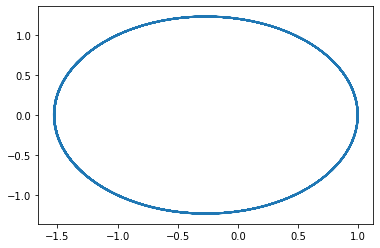

In [20]:
from scipy import integrate, optimize
import numpy as np
from matplotlib import pyplot as plt

GM = 4 * np.pi**2

f = lambda t, z: [ z[2], z[3], -((GM*z[0])/(z[0]**2 + z[1]**2)**(3/2)), -((GM*z[1])/(z[0]**2 + z[1]**2)**(3/2)) ]

solution = integrate.solve_ivp(
    f,                                  # Right hand side of the system
    (0, 12*np.pi),                      # Interval of integration
    np.array([1,0,0, 1.1 * 2*np.pi]),   # Initial state
    method = "RK45",                    # Integration method, default is RK45
    rtol = 1e-10                        # Tolerance for the relative error
)
plt.plot(solution.y[0], solution.y[1])
plt.show()


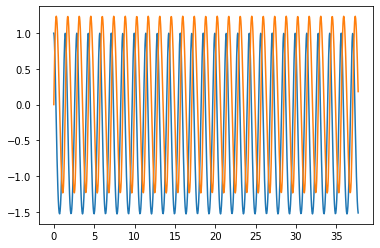

In [2]:
plt.plot(solution.t, solution.y[0], solution.t, solution.y[1])

In [3]:
def rTheta(theta, p, e):
    return p / (1 + e*np.cos(theta))

In [4]:
tlist = []
rlist = []
rtlist = []
for i in range(len(solution.y[0])):
    x = solution.y[0][i]
    y = solution.y[1][i]
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    tlist.append(theta)
    rlist.append(r)

parameters = optimize.curve_fit(rTheta, tlist, rlist)
p = parameters[0][0]
e = parameters[0][1]
rt = rTheta(tlist, p, e)
print(p, e)


1.2099936204322812 0.20997997309449343


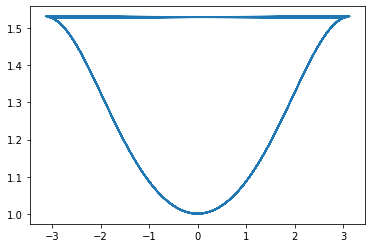

In [5]:
plt.plot(tlist, rlist)

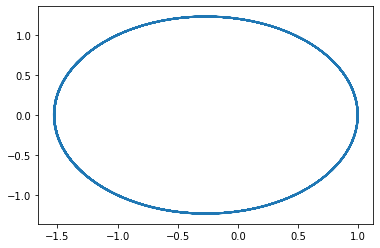

In [6]:
xax = rlist * np.cos(tlist)
yax = rlist * np.sin(tlist)
plt.plot(xax, yax)

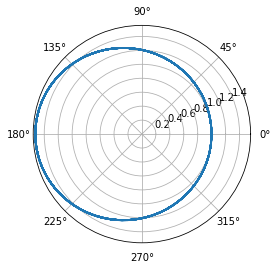

In [7]:
plt.polar(tlist, rlist)

In [8]:
def dA(theta, p, e):
    return ((p / (1 + e*np.cos(theta)))**2) / 2

start = 1
slutt = 5

areal1 = integrate.quad(dA, tlist[start], tlist[slutt], args=(p,e))
print(areal1)

start = 6
slutt = 10
areal2 = integrate.quad(dA, tlist[start], tlist[slutt], args=(p,e))
print(areal2)

(0.4763212465330242, 5.28822815019119e-15)
(0.5911659460971674, 6.563260447313895e-15)


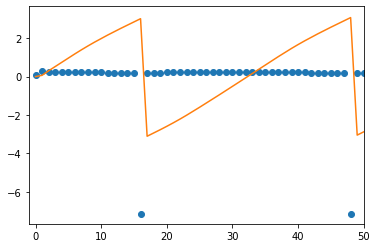

In [9]:
dt = np.roll(tlist,-1) - tlist
dA2 = (((p / (1 + e*np.cos(theta)))**2) / 2)*dt

plt.xlim(-1, 50)
plt.plot(dA2, 'o')
plt.plot(tlist)

In [10]:
periodTime = 0
temp = 0
for i in range(len(solution.y[0])):
    if dA2[i] < -3:
        if temp > 0:
            periodTime = solution.t[i] - temp
            break
        temp = solution.t[i]
print(periodTime)

1.4438362050929139


In [11]:
a = p / (1 - e**2)
time = np.sqrt(a**3)
print(time)

1.4241318405579686


In [12]:
ratio = time**2/a**3
print(ratio)

1.0


In [13]:
ratio2 = periodTime**2/a**3
print(ratio2)

1.027863543658269


Task 5

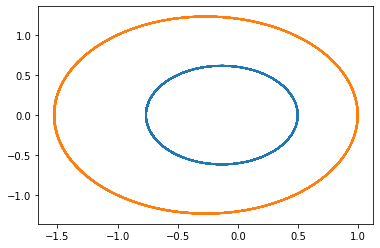

In [14]:
solution2 = integrate.solve_ivp(f, (0, 12*np.pi), np.array([0.5,0,0, 1.1 * 2*np.pi*np.sqrt(2)]), method="RK45", rtol  = 1e-10 )
plt.plot(solution2.y[0], solution2.y[1])
plt.plot(solution.y[0], solution.y[1])

1.2099936204322812 0.6049948873504372
0.5035042404348617
1.0


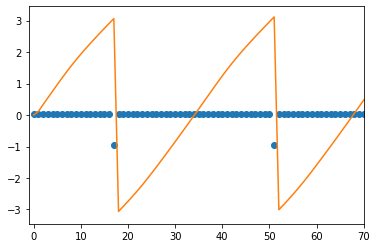

In [16]:
def rTheta_e(theta, p):
    return p / (1 + 0.20997997309449343*np.cos(theta))

tlist2 = []
rlist2 = []
rtlist2 = []
for i in range(len(solution2.y[0])):
    x2 = solution2.y[0][i]
    y2 = solution2.y[1][i]
    r2 = np.sqrt(x2**2 + y2**2)
    theta2 = np.arctan2(y2, x2)
    tlist2.append(theta2)
    rlist2.append(r2)

parameters2 = optimize.curve_fit(rTheta_e, tlist2, rlist2)
p2 = parameters2[0][0]

rt2 = rTheta(tlist2, p2, e)
dt2 = np.roll(tlist2,-1) - tlist2
dA22 = (((p2 / (1 + e*np.cos(theta2)))**2) / 2)*dt2

plt.xlim(-1, 70)
plt.plot(dA22, 'o')
plt.plot(tlist2)
print(p, p2)
a = p2 / (1 - e**2)
time = np.sqrt(a**3)
print(time)
ratio = time**2/a**3
print(ratio)